In [133]:
from gutenbergpy.gutenbergcache import GutenbergCache, GutenbergCacheTypes
import os
import json
import pandas as pd
import numpy as np
import pickle as pkl
import seaborn as sns
import gensim
from gensim.test.utils import common_texts

# load config
with open('config.json', 'r') as f:
    config = json.load(f)
cwd = os.getcwd()
os.chdir(config['REPODIR'])
import Utils as U
from Corpus import Corpus
os.chdir(cwd)

from collections import Counter, defaultdict
import itertools

from gensim.models import KeyedVectors
from gensim.test.utils import datapath

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="dark")
import pickle as pkl
from sklearn.decomposition import PCA
import nltk

In [134]:
# with open("data_vFinal.pkl", "rb") as infile:
        # data = pkl.load(infile)

data = U.load_file('data_vFF.pkl', 'pkl', config['DATADIR'])

# Just table of contents
# data.pop(3064)

In [135]:
data_df = pd.DataFrame(data)
data_df.head()

,author_id,author_name,book_id,gutenbergbookid,title_x,text,text_lines,gb_id,Unnamed: 0_x,id_x,...,authoryearofdeath_y,language_y,downloads_y,subjects_y,type_y,subject_set,Sub_A_y,Sub_B_y,Sub_C_y,gbid_y
0,494,"Lincoln, Abraham",PG8,PG8,NaN,"[to header material., , ***, , Lincoln's Secon...",17,8,8.0,PG8,...,1865.0,['en'],25.0,{'United States -- Politics and government -- ...,Text,"['1861-1865', 'Politics and government', 'Pres...",1861-1865,Politics and government,Presidents,8
1,494,"Lincoln, Abraham",PG9,PG9,NaN,"[I have no lawful right to do so, and I have n...",77,9,9.0,PG9,...,1865.0,['en'],36.0,{'United States -- Politics and government -- ...,Text,"['1861-1865', 'Politics and government', 'Pres...",1861-1865,Politics and government,Presidents,9
2,494,"Lincoln, Abraham",PG9,PG9,NaN,[for a minority of their own will secede from ...,277,9,9.0,PG9,...,1865.0,['en'],36.0,{'United States -- Politics and government -- ...,Text,"['1861-1865', 'Politics and government', 'Pres...",1861-1865,Politics and government,Presidents,9
3,494,"Lincoln, Abraham",PG9,PG9,NaN,"[in both cases, and a few break over in each. ...",327,9,9.0,PG9,...,1865.0,['en'],36.0,{'United States -- Politics and government -- ...,Text,"['1861-1865', 'Politics and government', 'Pres...",1861-1865,Politics and government,Presidents,9
4,494,"Lincoln, Abraham",PG9,PG9,NaN,[There is some difference of opinion whether t...,127,9,9.0,PG9,...,1865.0,['en'],36.0,{'United States -- Politics and government -- ...,Text,"['1861-1865', 'Politics and government', 'Pres...",1861-1865,Politics and government,Presidents,9


Index(['author_id', 'author_name', 'book_id', 'gutenbergbookid', 'title_x',
       'text', 'text_lines', 'gb_id', 'Unnamed: 0_x', 'id_x', 'title_y',
       'author_x', 'authoryearofbirth_x', 'authoryearofdeath_x', 'language_x',
       'downloads_x', 'subjects_x', 'type_x', 'Sub_A_x', 'Sub_B_x', 'Sub_C_x',
       'gbid_x', 'Unnamed: 0_y', 'id_y', 'author_y', 'authoryearofbirth_y',
       'authoryearofdeath_y', 'language_y', 'downloads_y', 'subjects_y',
       'type_y', 'subject_set', 'Sub_A_y', 'Sub_B_y', 'Sub_C_y', 'gbid_y'],
      dtype='object')

In [137]:
data_df = data_df[['author_id', 'author_name', 'book_id', 'gutenbergbookid', 'title_y',
       'text', 'text_lines', 'authoryearofbirth_x', 'authoryearofdeath_x',
       'downloads_x', 'subjects_x', 'Sub_A_x', 'Sub_A_y', 'Sub_B_y', 'Sub_C_y']]

In [138]:
data_df.head()

,author_id,author_name,book_id,gutenbergbookid,title_y,text,text_lines,authoryearofbirth_x,authoryearofdeath_x,downloads_x,subjects_x,Sub_A_x,Sub_A_y,Sub_B_y,Sub_C_y
0,494,"Lincoln, Abraham",PG8,PG8,Abraham Lincoln's Second Inaugural Address,"[to header material., , ***, , Lincoln's Secon...",17,1809.0,1865.0,25.0,{'United States -- Politics and government -- ...,United States,1861-1865,Politics and government,Presidents
1,494,"Lincoln, Abraham",PG9,PG9,Abraham Lincoln's First Inaugural Address,"[I have no lawful right to do so, and I have n...",77,1809.0,1865.0,36.0,{'United States -- Politics and government -- ...,United States,1861-1865,Politics and government,Presidents
2,494,"Lincoln, Abraham",PG9,PG9,Abraham Lincoln's First Inaugural Address,[for a minority of their own will secede from ...,277,1809.0,1865.0,36.0,{'United States -- Politics and government -- ...,United States,1861-1865,Politics and government,Presidents
3,494,"Lincoln, Abraham",PG9,PG9,Abraham Lincoln's First Inaugural Address,"[in both cases, and a few break over in each. ...",327,1809.0,1865.0,36.0,{'United States -- Politics and government -- ...,United States,1861-1865,Politics and government,Presidents
4,494,"Lincoln, Abraham",PG9,PG9,Abraham Lincoln's First Inaugural Address,[There is some difference of opinion whether t...,127,1809.0,1865.0,36.0,{'United States -- Politics and government -- ...,United States,1861-1865,Politics and government,Presidents


In [139]:
data_df = data_df.rename(columns={
    'title_y' : 'title',
    'authoryearofbirth_x':'authoryearofbirth',
    'authoryearofdeath_x':'authoryearofdeath',
    'downloads_x':'downloads',
    'subjects_x':'subjects',
    'Sub_A_x':'topic',
    'Sub_A_y':'Sub_A',
    'Sub_B_y':'Sub_B',
    'Sub_C_y':'Sub_C'
})

In [140]:
data_df.shape

(173107, 15)

In [147]:
# Save Results
data_out = data_df.to_dict(orient='records')

with open('data_vFF.pkl', 'wb') as f:
    pkl.dump(data_out, f)

EOFError: Ran out of input

In [75]:
subsample = data_df.sample(9000, random_state=0)

subject_b = [s for s in subsample['Sub_B']]
other_subject = [s if s != 'Fiction' else subject_b[idx] for idx, s in enumerate(subsample['Sub_A']) ]

subsample['sub'] = other_subject
subsample = subsample[subsample['authoryearofbirth'] > 1750]

<Axes: xlabel='sub'>

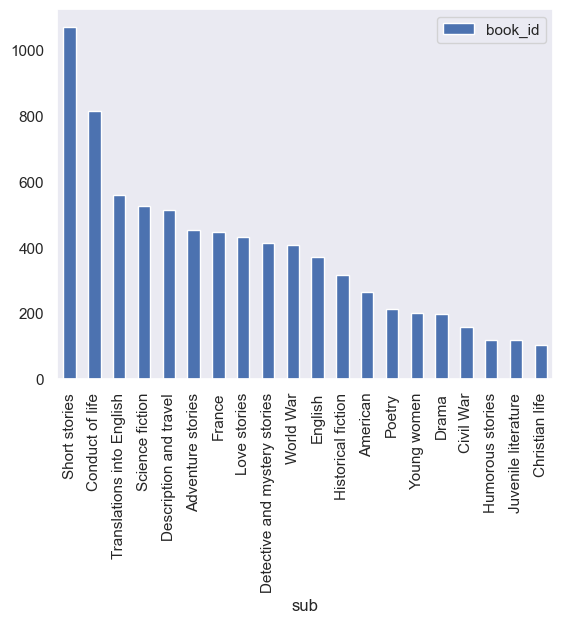

In [76]:
subsample.groupby('sub').agg({'book_id':'count'}).sort_values(by = 'book_id', ascending=False).head(20).plot(kind='bar')

Fetch works for every book

In [77]:
data = subsample.to_dict(orient='records')

In [78]:
data_text = [dat['text'] for dat in data]
tokenizer = nltk.RegexpTokenizer(r'\w+')

tokenized_text = [tokenizer.tokenize(' '.join(text)) for text in data_text]
joined_text = [' '.join(text) for text in data_text]

In [32]:
# Worked fine with 'glove-wiki-gigaword-300'

import gensim.downloader
glove_vectors = gensim.downloader.load('glove-wiki-gigaword-100')

In [79]:
for idx, d in enumerate(data):
    d['vectors'] = []
    for token in tokenized_text[idx]:
        try:
            d['vectors'].append(glove_vectors[token])
        except:
            continue
    d['mean_vector'] = np.array([v for v in d['vectors']]).mean(axis = 0)
    if not d['mean_vector'].shape:
        d['mean_vector'] = np.zeros((100,))
    d['key'] = str(d['book_id']) + str(d['text_lines'])
    #  d['subject'] = catalog[catalog['book_id'] == d['book_id']].iloc[0, 9]

/var/folders/b1/vw0sn5w90nnccbfn7bskv0jm0000gn/T/ipykernel_17646/1942627058.py:8: RuntimeWarning:

Mean of empty slice.

/Users/stephentoner/miniconda3/envs/si699proj/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning:

invalid value encountered in scalar divide



In [80]:
# mean_vectors = np.array([d['mean_vector'] for d in data if d['mean_vector'].shape and d['subject'] != 'Other'])
mean_vectors = np.array([d['mean_vector'] for d in data if d['mean_vector'].shape])

In [81]:
# ids = [idx for idx, d in enumerate(data) if d['mean_vector'].shape and d['subject'] != 'Other']
ids = [idx for idx, d in enumerate(data) if d['mean_vector'].shape]

In [82]:
titles = [data[idx]['title'] for idx in ids]
subjects = [data[idx]['sub'] for idx in ids]
# decade = [int(data[idx]['decade']) for idx in ids]
yob = [int(data[idx]['authoryearofbirth']) for idx in ids]
yod = [int(data[idx]['authoryearofdeath']) for idx in ids]
topics = [data[idx]['topic'] for idx in ids]
downloads = [int(data[idx]['downloads']) for idx in ids]
# gender = [1 if data[idx]['gender'] == "F" else 0 for idx in ids]
# penname =[1 if data[idx]['penname'] == "Y" else 0 for idx in ids]
# pn_gend = [str(penname[idx]) + str(gender[idx]) for idx in ids]

In [36]:
data[9]['text']

["laid in the water at the river's edge while the pyre is being prepared.",
 '',
 'The first subject was a man.  When the Doms unswathed him to wash him, he',
 'proved to be a sturdily built, well-nourished and handsome old gentleman,',
 'with not a sign about him to suggest that he had ever been ill.  Dry wood',
 'was brought and built up into a loose pile; the corpse was laid upon it',
 'and covered over with fuel.  Then a naked holy man who was sitting on',
 'high ground a little distance away began to talk and shout with great',
 'energy, and he kept up this noise right along.  It may have been the',
 'funeral sermon, and probably was.  I forgot to say that one of the',
 'mourners remained behind when the others went away.  This was the dead',
 "man's son, a boy of ten or twelve, brown and handsome, grave and",
 'self-possessed, and clothed in flowing white.  He was there to burn his',
 'father.  He was given a torch, and while he slowly walked seven times',
 'around the pyre the n

In [99]:
two_dim = mean_vectors



In [84]:
# two_dim = PCA(random_state =0).fit_transform(mean_vectors)[:1000,]
two_dim = PCA(random_state =0).fit_transform(mean_vectors)


In [100]:
xPCA = two_dim[:,0]; yPCA = two_dim[:,1]
xPCA.shape

(9000,)

<Axes: >

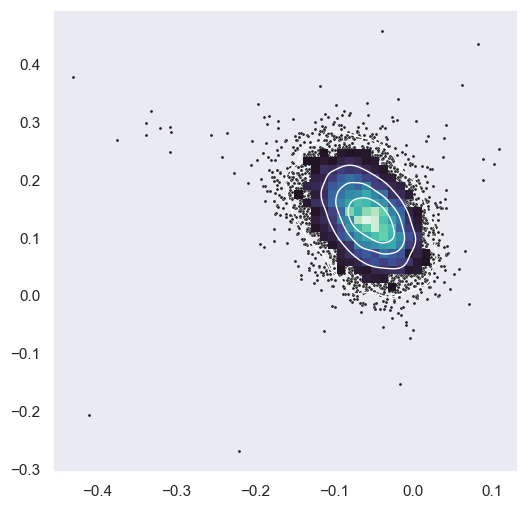

In [101]:
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=xPCA, y=yPCA, s =5, color=".15")
sns.histplot(x=xPCA, y=yPCA, bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=xPCA, y=yPCA, levels=5, color="w", linewidths=1)

In [87]:
import plotly.express as px

def pca_scatterplot_3D(model, user_input=None, color_map=None, sentences = None):

    # three_dim = user_input[:,:3]
    three_dim = PCA(random_state=0).fit_transform(user_input)[:,:3]

    df = pd.DataFrame(three_dim)
    df['Label'] = color_map
    df['sentence'] = sentences

    plot_figure = px.scatter_3d(df, x = 0, y = 1, z = 2, color = 'Label', hover_name = 'sentence', size_max = 2)

    plot_figure.show()

In [19]:

# For use in the famous literature set
# decade_gender = [int(str(decade[idx]) + str(gender[idx])) for idx in ids]

In [88]:
from sklearn import mixture

gmm = mixture.BayesianGaussianMixture(n_components=5, covariance_type="full").fit(two_dim)
clusters = gmm.predict(mean_vectors)

/Users/stephentoner/miniconda3/envs/si699proj/lib/python3.9/site-packages/sklearn/mixture/_base.py:274: ConvergenceWarning:

Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.



In [109]:
# pca_scatterplot_3D(data, user_input = two_dim, color_map = [str(c) for c in clusters], sentences = titles)
pca_scatterplot_3D(data, user_input = two_dim, color_map = topics, sentences = titles)


In [89]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters = 6).fit(mean_vectors)

cluster_labels = [str(lab) for lab in clustering.labels_]

In [103]:
extract_data = []

for i, idx in enumerate(ids):
    data[idx]['cluster'] = str(cluster_labels[i])
    extract_data.append(data[idx].copy())



In [121]:
t = pd.DataFrame(extract_data).groupby(by = ['cluster', 'Sub_A']).agg('count')

In [111]:
ed = pd.DataFrame(extract_data)

In [115]:
ed.columns

Index(['author_id', 'author_name', 'book_id', 'gutenbergbookid', 'title',
       'text', 'text_lines', 'authoryearofbirth', 'authoryearofdeath',
       'downloads', 'subjects', 'topic', 'Sub_A', 'Sub_B', 'Sub_C', 'sub',
       'vectors', 'mean_vector', 'key', 'cluster'],
      dtype='object')

In [120]:
ed[ed['topic']=='Translations into English'].Sub_C.unique()

array(['Church history', nan, 'German fiction', '1860-1904',
       'French fiction', 'Alps', 'Indian drama', 'Avarice',
       'Man-woman relationships', 'Russia', 'Parodies', 'Paris (France)',
       '1828-1910', 'Biographical fiction', 'French',
       'History and criticism', 'German', 'Mythology', 'Germany',
       '1818-1883', '1861-1941', 'Egyptian literature',
       'Eighty Years War', 'Family life', 'Autobiographical fiction',
       'Strindberg', 'Horror tales', 'American poetry', 'Fairy plays',
       'Nuremberg (Germany)', 'Vienna (Austria)',
       'Philosophical anthropology', 'Ghost stories', 'Romances',
       'Chouans', 'Dutch fiction', 'Norwegian drama', 'Palestine',
       'French essays', 'Politics and government',
       'Triangles (Interpersonal relations)', 'Women'], dtype=object)

In [122]:
t['key'].unstack(0)

cluster,0,1,2,3,4,5
Sub_A,,,,,,
17th century,3.0,NaN,2.0,NaN,NaN,NaN
1861-1865,3.0,NaN,NaN,NaN,NaN,NaN
20th century,22.0,28.0,12.0,NaN,25.0,3.0
Adventure stories,173.0,96.0,72.0,NaN,107.0,6.0
American,127.0,44.0,34.0,2.0,39.0,17.0
Authors,34.0,28.0,2.0,NaN,4.0,1.0
Biography,8.0,NaN,NaN,NaN,NaN,NaN
Boys,26.0,20.0,6.0,NaN,31.0,NaN
Children,13.0,17.0,2.0,NaN,11.0,NaN


In [113]:
topic_set = ed.topic.unique()
topic_set

array(['Fiction', 'Adventure stories', 'Juvenile literature',
       'Juvenile fiction', 'Translations into English', 'History',
       '19th century', 'Science fiction', 'Great Britain',
       'Short stories', 'Detective and mystery stories',
       'Description and travel', 'American', 'Biography', 'United States',
       'England', 'World War', 'English', 'Poetry', 'Drama',
       'English wit and humor', 'Historical fiction', 'France',
       'Love stories', 'Social life and customs', 'Children',
       'Conduct of life', 'Young women'], dtype=object)